Now we load the model we trained in the last step. If you're using a GPU, this will start it up, which can takeup to **10 seconds**. If you're using a GPU with less memory like the 750M, make sure to close the previous notebook or you will run out of GPU memory.

In [10]:
import keras
from keras.models import model_from_json
model = model_from_json(open('gender_model.json').read())
model.load_weights('gender_weights.h5')
print(model.input)

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Tensor("conv2d_1_input_1:0", shape=(?, 32, 32, 1), dtype=float32)


Let's test the model by defining a function that evaluates a single image and prints a corresponding indicator.

In [11]:
import numpy as np
def print_indicator(data, model, class_names, bar_width=50):
    input = np.array([data])
    print(input.shape)
    probabilities = model.predict(np.array([data]))[0]
    print(probabilities)
    left_count = int(probabilities[1] * bar_width)
    right_count = bar_width - left_count
    left_side = '-' * left_count
    right_side = '-' * right_count
    print class_names[0], left_side + '###' + right_side, class_names[1]

We'll test it on one image from our data set.

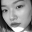

(1, 32, 32, 1)
[1.000e+00 7.597e-12]
Female ###-------------------------------------------------- Male


In [12]:
from utils import show_array
X = np.load('X.npy')
class_names = ['Female', 'Male']
img = X[1100]
show_array(255 * img)
print_indicator(img, model, class_names)